In [12]:
# Definición de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import MinMaxScaler  # Añadido para escalamiento
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [13]:
df = pd.read_csv("./samsung.csv")
df.head()

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [14]:
df.describe()

,Close,Volume
count,2850.000000,2.850000e+03
mean,26611.305263,1.610505e+07
std,11991.608543,8.661794e+06
min,8040.000000,0.000000e+00
25%,16300.000000,1.021426e+07
50%,25600.000000,1.359033e+07
75%,30850.000000,1.960970e+07
max,57220.000000,6.487345e+07


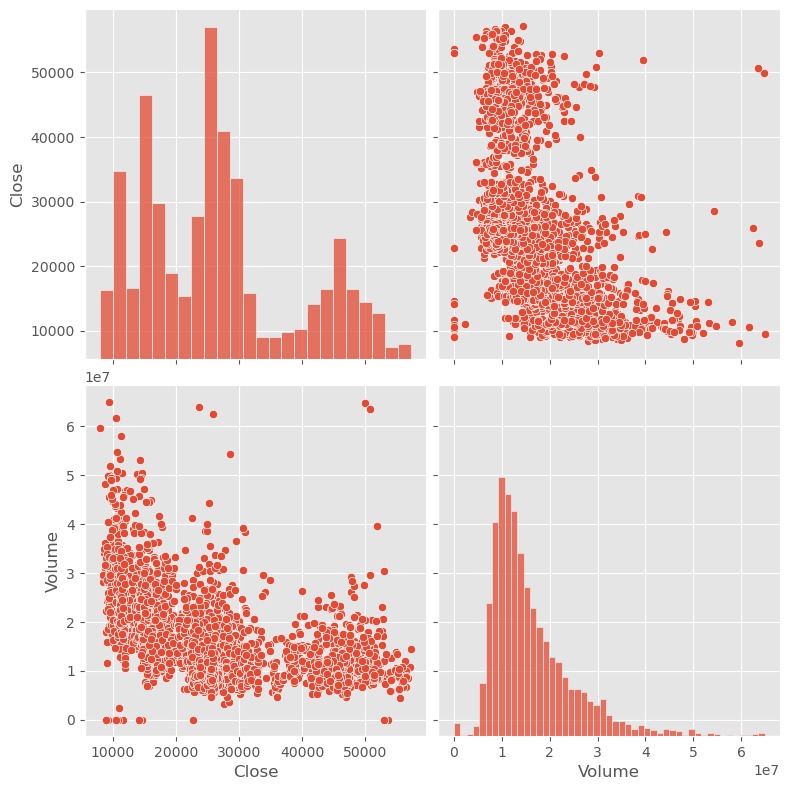

In [15]:
# graficar los datos

sb.pairplot(df.dropna(), height=4, vars=["Close", "Volume"], kind='scatter')

In [17]:
# Normalizar
df_norm = df.copy()
df_norm.head()

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [18]:
scaler = MinMaxScaler()
scaler.fit(df_norm[['Close']])
df_norm['Close'] = scaler.transform(df_norm[['Close']])
scaler.fit(df_norm[['Volume']])
df_norm['Volume'] = scaler.transform(df_norm[['Volume']])
df_norm.head()


,Date,Close,Volume
0,02/01/2008,0.057747,0.278191
1,03/01/2008,0.058560,0.298219
2,04/01/2008,0.055714,0.277422
3,07/01/2008,0.047580,0.613305
4,08/01/2008,0.046360,0.382031


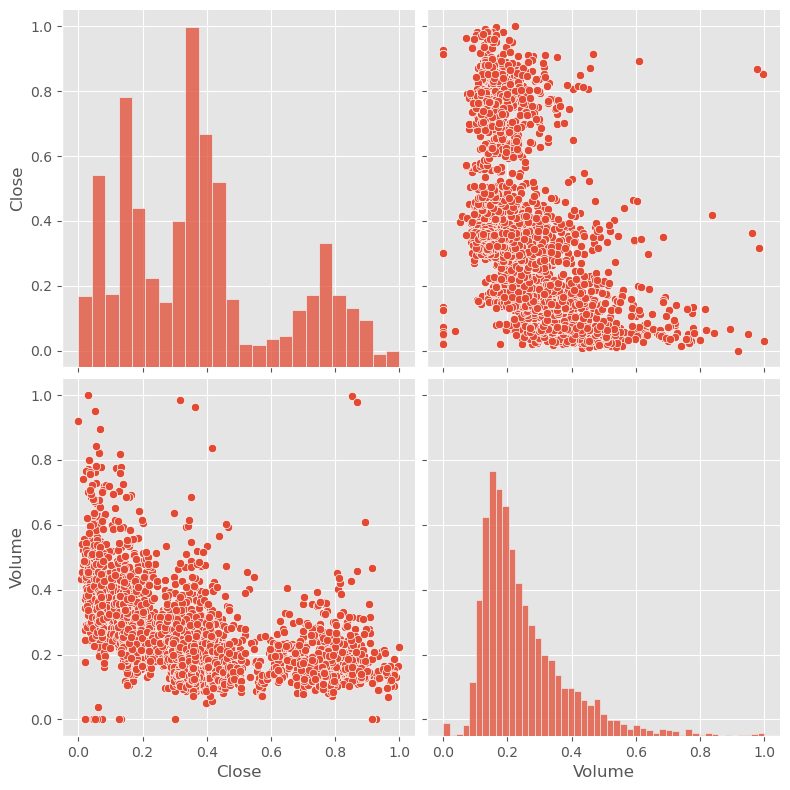

In [19]:
# graficar los datos normalizados
sb.pairplot(df_norm.dropna(), height=4, vars=["Close", "Volume"], kind='scatter')


In [24]:
# Seleccionar las características relevantes para clustering
X = df_norm[['Close', 'Volume']]

# Rango de número de clústeres (1 a 10, por ejemplo)
num_clusters = range(1, 11)

# Lista para almacenar las sumas de distancias cuadradas intra-cluster
inertia = []

# Iterar sobre diferentes número de clústeres
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Obtener la suma de distancias cuadradas intra-cluster
    inertia.append(kmeans.inertia_)

c:\Users\sgale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sgale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sgale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sgale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

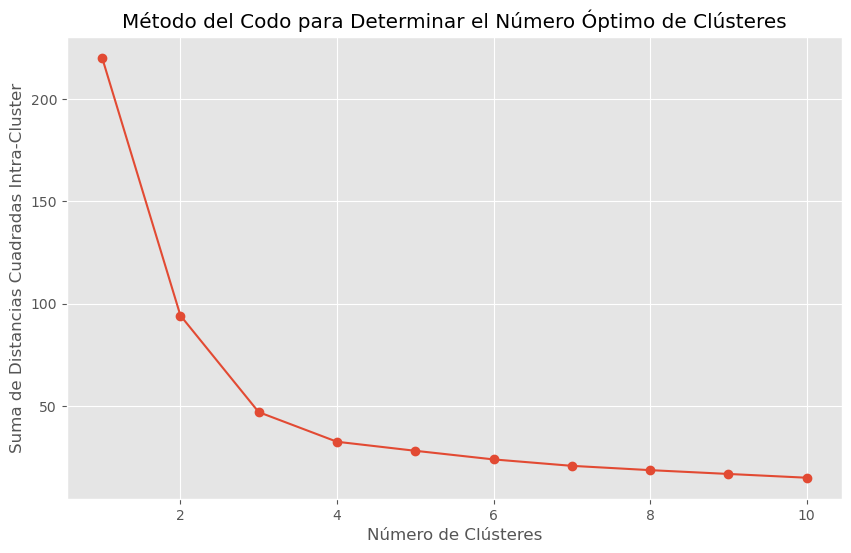

In [25]:
# Graficar el codo para determinar el número óptimo de clústeres
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de Distancias Cuadradas Intra-Cluster')
plt.show()

c:\Users\sgale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sgale\AppData\Local\Temp\ipykernel_4204\453841501.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores_clusters = plt.cm.get_cmap('viridis', k_optimo)


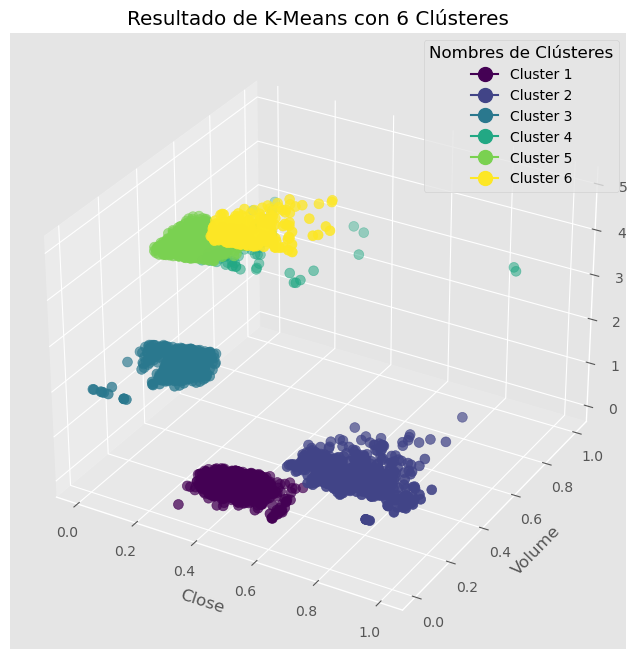

In [34]:
k_optimo = 6

# Ajustar K-Means con el número óptimo de clústeres
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42)
df_norm['Cluster'] = kmeans_optimo.fit_predict(X)

# Crear un mapeo de colores para nombres de clústeres
colores_clusters = plt.cm.get_cmap('viridis', k_optimo)

# Visualizar los resultados con colores de clústeres
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Utilizar el mapeo de colores directamente en lugar de nombres
scatter = ax.scatter(df_norm['Close'], df_norm['Volume'], df_norm['Cluster'], c=df_norm['Cluster'], cmap=colores_clusters, s=50)

ax.set_xlabel('Close')
ax.set_ylabel('Volume')
ax.set_zlabel('Cluster')
ax.set_title('Resultado de K-Means con {} Clústeres'.format(k_optimo))

# Crear una leyenda personalizada
handles = [plt.Line2D([0], [0], marker='o', color=colores_clusters(i / k_optimo), markersize=10, label='Cluster {}'.format(i+1)) for i in range(k_optimo)]
ax.legend(handles=handles, title='Nombres de Clústeres', title_fontsize='12')

plt.show()


In [36]:

# Obtener las etiquetas de los clústeres
cantidades = df_norm['Cluster'].value_counts() # Cantidad de elementos por clúster
#sumar 1 a los indices para que empiecen en 1
cantidades.index = cantidades.index + 1
cantidades.sort_index(inplace=True)
cantidades




1    976
2    599
3    539
4     84
5    383
6    269
Name: Cluster, dtype: int64

In [39]:
# interpretación de los resultados de clustering
# Las etiquetas no nos dicen mucho, y las cantidades numéricas no ayudan mucho, sim embargo, podemos ver que los clústeres 1, 2 y 3 tienen la mayor cantidad de elementos. Tambien podemos concluir que entre 4 a 8 clústeres es una buena cantidad para este conjunto de datos.